In [33]:
import cv2
import os
from keras.utils import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL  import Image
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,GlobalMaxPool2D
from keras.models import Sequential
from keras.models import load_model

In [34]:
Base_dir=r"D:\sohrab\AI\AI_Code\UTKFace"

In [35]:
images=os.listdir(Base_dir)

In [36]:
images_paths = []
age_labels = []
gender_labels = []
race_labels = []

for filename in images:
    image_path = os.path.join(Base_dir, filename)
    temp = filename.split('_')
    if str(temp[2]).isnumeric() and str(temp[0]).isnumeric():
        age = int(temp[0])
        gender = int(temp[1])
        race=int(temp[2])
        images_paths.append(image_path)
        race_labels.append(race)
        age_labels.append(age)
        gender_labels.append(gender)    

In [37]:
temp

['9', '1', '4', '20170103213057382.jpg.chip.jpg']

In [38]:
len(age_labels),len(gender_labels)

(23705, 23705)

In [39]:
def standard_saz(images):    
    features=[]
    for image in images:
        img=load_img(image,grayscale=True)
        img=img.resize((128,128), Image.LANCZOS)
        img=np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    
    
    return features
        

In [40]:
def rescale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img, (128,128))              
    img = img.reshape(128,128,1) / 255.0          
    img = np.expand_dims(img, axis=0) 
    return img

In [41]:
x=standard_saz(images_paths)
x=x/255

C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
x.shape


(23705, 128, 128, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(GlobalMaxPool2D())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(126,activation="relu"))
model.add(Dense(1))
print(model.summary())
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
# x=Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")(x)
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")(x)
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Dense(256,activation="relu")(x)
# x=Dropout(0.3)(x)
# x=Dense(126,activation="relu")(x)

# age_output=Dense(1,name='age_output')(x)
# gender_output=Dense(1,activation='sigmoid',name='gender_output')(x)
# # race_output=Dense(1,activation='sigmoid',name='race_output')(x)

# model.compile(
#     optimizer="adam",
#     loss={"age_output":"mse", "gender_output":"binary_crossentropy"},
#     metrics={"age_output":"mae", "gender_output":"accuracy"}
# )

In [ ]:
y_age=np.array(age_labels)
y_age=y_age/100

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x,y_age,shuffle=True,random_state=42)


In [ ]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
556/556 [==============================] - 76s 136ms/step - loss: 5.6201 - mse: 5.6201 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 2/20
556/556 [==============================] - 81s 145ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 3/20
556/556 [==============================] - 181s 326ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 4/20
556/556 [==============================] - 367s 660ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 5/20
556/556 [==============================] - 242s 434ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 6/20
556/556 [==============================] - 188s 339ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 7/20
556/556 [==============================] - 75s 135ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 8/20
556/556 [==============================]

In [42]:
model=load_model("project2.h5")

In [ ]:
out=model.predict(np.expand_dims(X_test[2],axis=0))

1/1 [==============================] - 0s 169ms/step


In [ ]:
int(out[0][0])

89

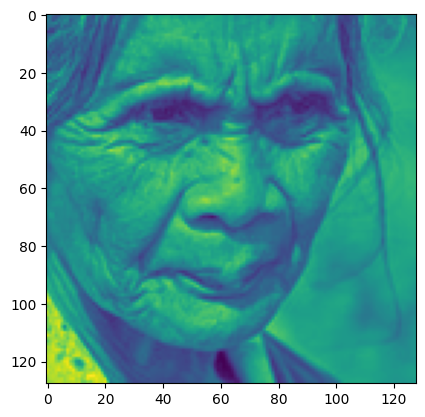

In [ ]:
plt.imshow(X_test[2])

In [ ]:
model.save("project2.h5")

In [ ]:
# x=Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")(x)
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")(x)
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Dense(256,activation="relu")(x)
# x=Dropout(0.3)(x)
# x=Dense(126,activation="relu")(x)

# age_output=Dense(1,name='age_output')(x)
# gender_output=Dense(1,activation='sigmoid',name='gender_output')(x)
# # race_output=Dense(1,activation='sigmoid',name='race_output')(x)

# model.compile(
#     optimizer="adam",
#     loss={"age_output":"mse", "gender_output":"binary_crossentropy"},
#     metrics={"age_output":"mae", "gender_output":"accuracy"}
# )

In [ ]:
y_age=np.array(age_labels)

In [43]:
import cv2
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot access the webcam")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Cannot read a frame from the webcam")
        break
    img_rescale=rescale(frame)
    predict=model.predict(img_rescale)
    
    cv2.putText(frame, str(int(predict[0][0])), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    
    cv2.imshow("Segmentation",frame)
    # print(results)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 14ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test).reshape(-1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test).reshape(-1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)


186/186 [==============================] - 7s 37ms/step
MSE: 136.0950443373281
MAE: 8.360973622377754
R² Score: 0.6540550074777012
186/186 [==============================] - 6s 33ms/step
MSE: 136.0950443373281
MAE: 8.360973622377754
R² Score: 0.6540550074777012
